In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Classroom/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
df = pd.read_csv(file_path)

# Define target and features
target = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux', 'h_alpha_flux_err',
    'nii_6584_flux', 'nii_6584_flux_err', 'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
    'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i', 'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16',
    'mendel_logM_p84', 'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50', 'mendel_logMb_p16',
    'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84', 'simard_b_t_g', 'simard_e_b_t_g',
    'simard_b_t_r', 'simard_e_b_t_r', 'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r', 'simard_Re',
    'simard_e_Re', 'simard_e', 'simard_e_e', 'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

X = df[features]
y = df[target]

In [ ]:
# Handling missing values by filling with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Drop rows where y_train is NaN
non_nan_indices = ~y_train.isna()
X_train = X_train[non_nan_indices]
y_train = y_train[non_nan_indices]

In [ ]:
# Initialize the Support Vector Regressor
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

In [ ]:
# Support Vector Regressor Predictions
y_pred_svr = svr.predict(X_test)

# Ensure consistent length by removing NaN values from both y_test and y_pred_svr
mask_svr = ~pd.isna(y_test) & ~pd.isna(y_pred_svr)
y_test_svr_clean = y_test[mask_svr]
y_pred_svr_clean = y_pred_svr[mask_svr]

# Calculate MSE, MAE, RMSE, and R2 for SVR
mse_svr = mean_squared_error(y_test_svr_clean, y_pred_svr_clean)
mae_svr = mean_absolute_error(y_test_svr_clean, y_pred_svr_clean)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_svr_clean, y_pred_svr_clean)

# Range of the target variable
y_range_svr = np.max(y_test_svr_clean) - np.min(y_test_svr_clean)

# Calculate accuracy by percentage for SVR
mse_accuracy_svr = (1 - mse_svr / y_range_svr) * 100
mae_accuracy_svr = (1 - mae_svr / y_range_svr) * 100
rmse_accuracy_svr = (1 - rmse_svr / y_range_svr) * 100

# Print evaluation metrics for SVR
print("Support Vector Regressor Performance:")
print(f'MSE - Value: {mse_svr:.4f}, Accuracy: {mse_accuracy_svr:.2f}%')
print(f'MAE - Value: {mae_svr:.4f}, Accuracy: {mae_accuracy_svr:.2f}%')
print(f'RMSE - Value: {rmse_svr:.4f}, Accuracy: {rmse_accuracy_svr:.2f}%')
print(f'R2 - Value: {r2_svr:.4f}')
print("-" * 50)


Support Vector Regressor Performance:
MSE - Value: 0.1219, Accuracy: 97.05%
MAE - Value: 0.2678, Accuracy: 93.52%
RMSE - Value: 0.3491, Accuracy: 91.56%
R2 - Value: 0.7163
--------------------------------------------------


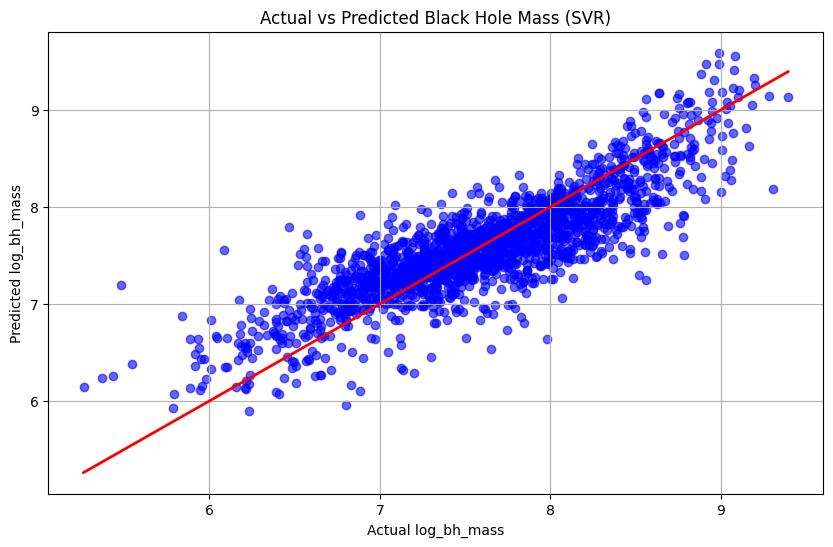

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_svr_clean, y_pred_svr_clean, alpha=0.6, color='blue')
plt.plot([min(y_test_svr_clean), max(y_test_svr_clean)], [min(y_test_svr_clean), max(y_test_svr_clean)], color='red', linewidth=2)
plt.title('Actual vs Predicted Black Hole Mass (SVR)')
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.grid(True)
plt.show()